In [104]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time
import sys
from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

from matplotlib.patches import Circle
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from numpy import unravel_index
from photutils.aperture import CircularAperture
from photutils.aperture import ApertureStats

In [105]:
hlc_file_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Fainter_disk/HLC/'
spc_file_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Fainter_disk/SPC/'

In [106]:
disk_hlc_med=fits.getdata(hlc_file_dir+'med_wd_I0.fits')
disk_hlc_std=fits.getdata(hlc_file_dir+'med_nd_I0.fits')
disk_nosub=fits.getdata(hlc_file_dir+'nopsf_wd_I0.fits')
disk_spc_med=fits.getdata(spc_file_dir+'med_wd_I0.fits')
disk_spc_std=fits.getdata(spc_file_dir+'std_wd_I0.fits')

disk_hlc_med[np.isnan(disk_hlc_med)]=0
disk_hlc_std[np.isnan(disk_hlc_std)]=0
disk_spc_med[np.isnan(disk_spc_med)]=0
disk_spc_std[np.isnan(disk_spc_std)]=0
disk_nosub[np.isnan(disk_nosub)]=0

In [107]:
figure_dir='/Users/polaris/Onedrive-UA/OneDrive - University of Arizona/Debris-Disk-Modelling/Debris-Disk-Modelling/Eps-eri-Roman_pol/Simulations_paper/Revision/Figures/'

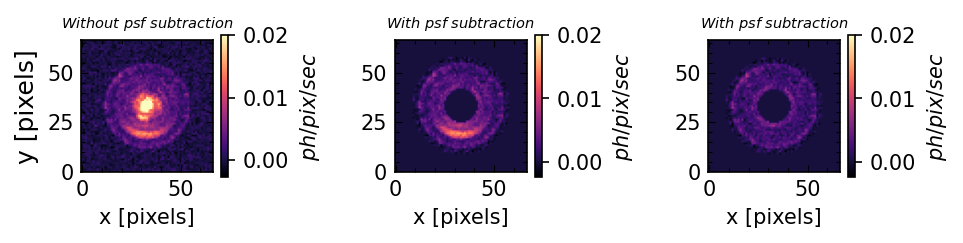

In [112]:
fig = plt.figure(dpi=150)

ax1=fig.add_subplot(132)
ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')
ax1.minorticks_on()
ax1.tick_params(which='both', direction='in', width=0.5, labelsize=10)
im1=ax1.imshow(disk_hlc_med,cmap='magma',vmax=0.02)
ax1.invert_yaxis()
#ax1.set_ylabel('y [pixels]',fontsize=10)
ax1.set_xlabel('x [pixels]',fontsize=10)
ax1.set_title('$With~psf~subtraction$',fontsize=7)
cb = fig.colorbar(im1,orientation='vertical',shrink=0.25)
cb.set_label("$ph/pix/sec$",fontsize=10)
cb.ax.tick_params(labelsize=10)

ax2=fig.add_subplot(133)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=10)
im2=ax2.imshow(disk_hlc_std,cmap='magma', vmax=0.02)
ax2.invert_yaxis()
#ax2.set_ylabel('y [pixels]',fontsize=12)
ax2.set_xlabel('x [pixels]',fontsize=10)
ax2.set_title('$With~psf~subtraction$',fontsize=7)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.25)
cb.set_label("$ph/pix/sec$",fontsize=10)
cb.ax.tick_params(labelsize=10)
fig.subplots_adjust(hspace=0.5, wspace=0.6, top=0.9, right=0.95)

ax2=fig.add_subplot(131)
ax2.yaxis.set_ticks_position('both')
ax2.xaxis.set_ticks_position('both')
ax2.minorticks_on()
ax2.tick_params(which='both', direction='in', width=0.5, labelsize=10)
im2=ax2.imshow(disk_nosub,cmap='magma', vmax=0.02)
ax2.invert_yaxis()
ax2.set_ylabel('y [pixels]',fontsize=12)
ax2.set_xlabel('x [pixels]',fontsize=10)
ax2.set_title('$Without~psf~subtraction$',fontsize=7)
cb = fig.colorbar(im2,orientation='vertical',shrink=0.25)
cb.set_label("$ph/pix/sec$",fontsize=10)
cb.ax.tick_params(labelsize=10)
fig.subplots_adjust(hspace=0.5, wspace=0.9, top=0.9, right=0.95)
fig.savefig(figure_dir+'photon_counted_faintdisk_epseri.pdf', format='pdf', bbox_inches='tight')

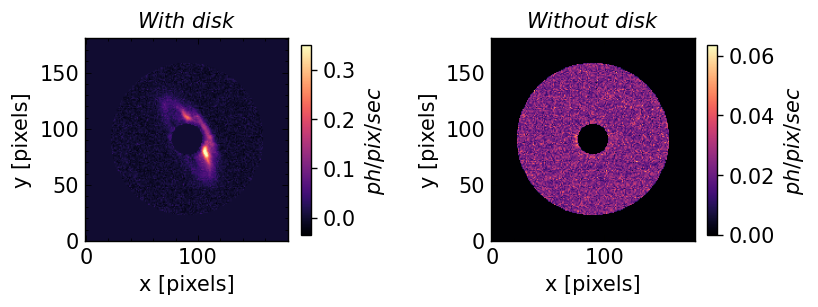

In [41]:
fig = plt.figure(dpi=125)
ax3=fig.add_subplot(121)
ax3.yaxis.set_ticks_position('both')
ax3.xaxis.set_ticks_position('both')
ax3.minorticks_on()
ax3.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im3=ax3.imshow(disk_spc_med,cmap='magma',vmax=0.35)
ax3.invert_yaxis()
ax3.set_ylabel('y [pixels]',fontsize=12)
ax3.set_xlabel('x [pixels]',fontsize=12)
ax3.set_title('$With~disk$',fontsize=12)
cb = fig.colorbar(im3,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)

ax4=fig.add_subplot(122)
ax4.yaxis.set_ticks_position('both')
ax4.xaxis.set_ticks_position('both')
ax4.minorticks_on()
ax4.tick_params(which='both', direction='in', width=0.5, labelsize=12)
im4=ax4.imshow(disk_spc_std,cmap='magma')
ax4.invert_yaxis()
ax4.set_ylabel('y [pixels]',fontsize=12)
ax4.set_xlabel('x [pixels]',fontsize=12)
ax4.set_title('$Without~disk$',fontsize=12)
cb = fig.colorbar(im4,orientation='vertical',shrink=0.4)
cb.set_label("$ph/pix/sec$",fontsize=12)
cb.ax.tick_params(labelsize=12)
fig.subplots_adjust(hspace=0.5, wspace=0.6, top=0.9, right=0.95)
fig.savefig(figure_dir+'photon_counted_faintdisk_hr4796a.pdf', format='pdf', bbox_inches='tight')